In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import  RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Step 1 EDA

In [3]:
#read the data
bike = pd.read_csv("D:/datasets//day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# list of Numerical and Categorical variables
num_cols=["temp","atemp","hum","windspeed","casual","registered","cnt"] 
cat_cols=["season","yr","mnth","holiday","weekday","workingday","weathersit"]

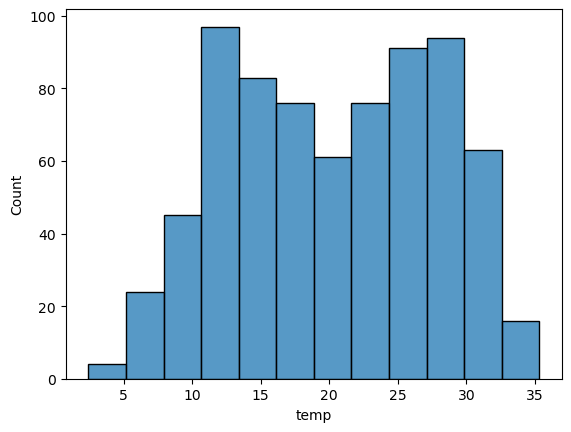

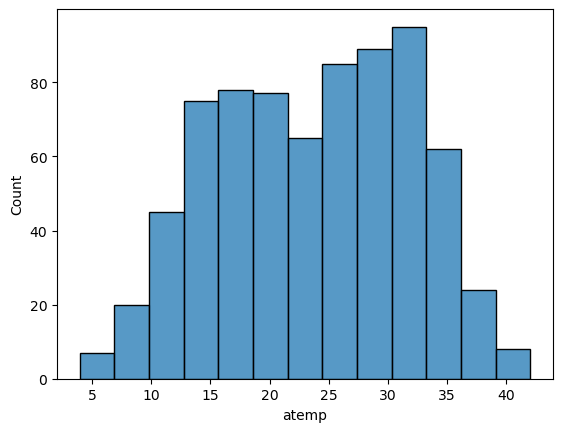

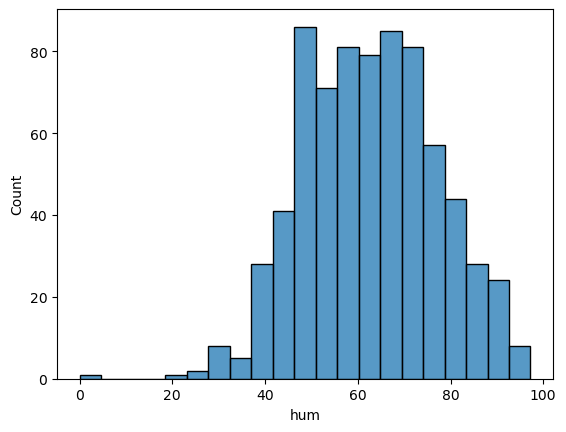

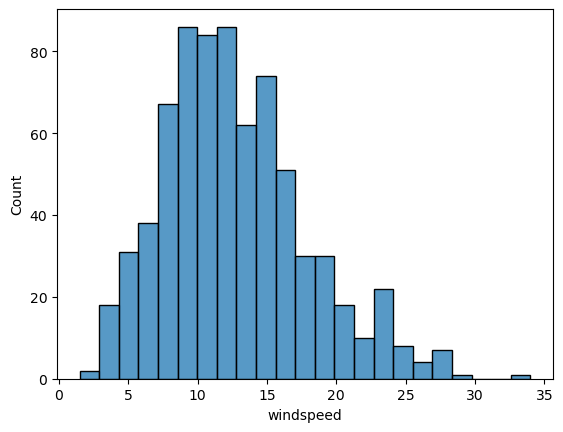

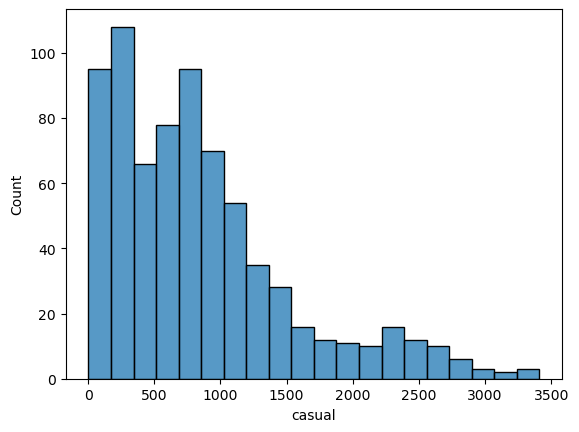

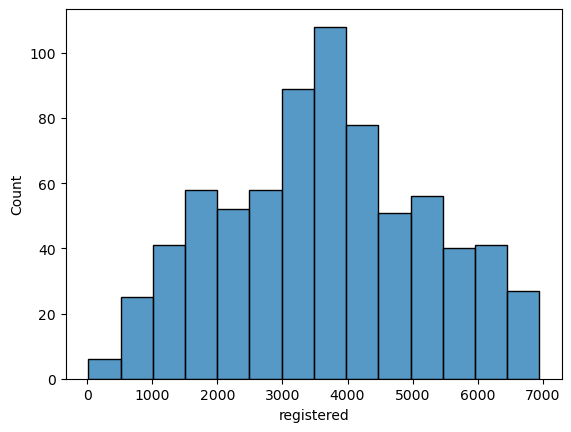

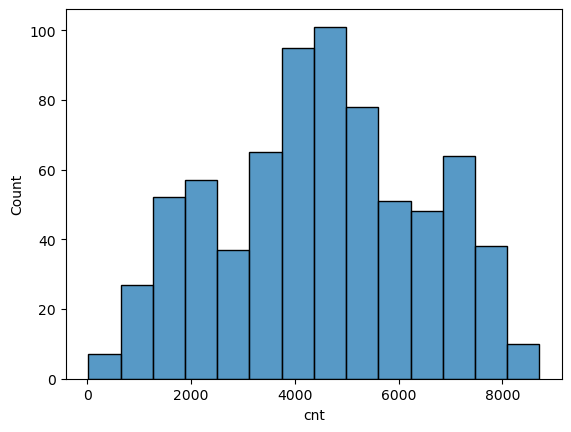

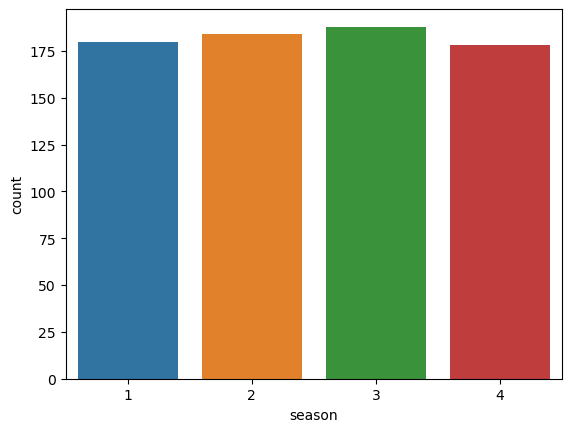

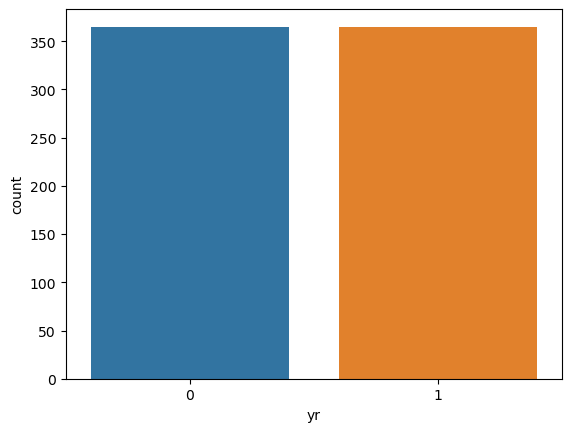

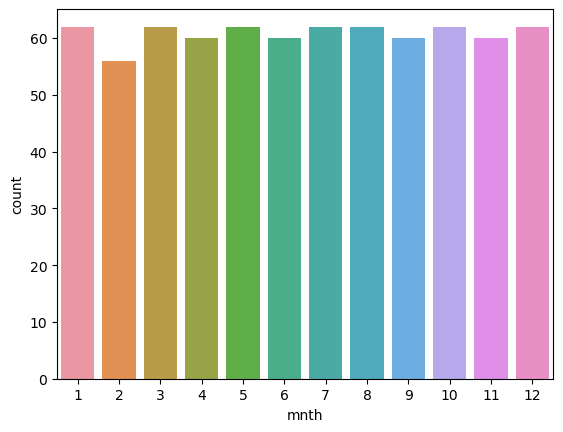

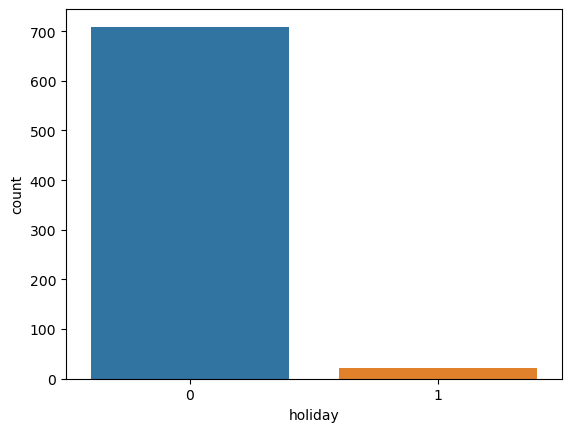

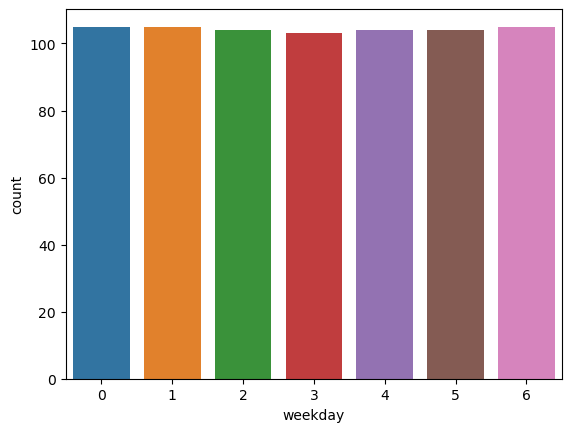

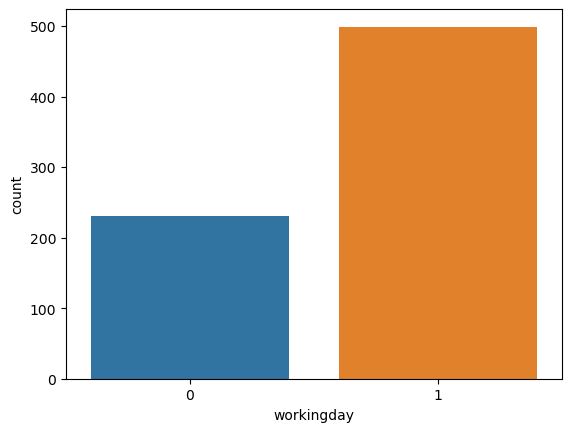

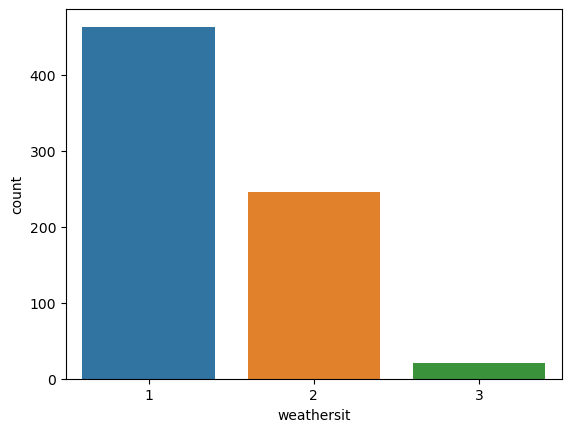

In [8]:
# visualising the numeric variable
# Temp and Atemp 10 - 30 cnt is significant
# Count is high between 50-80 humidity
# Count is high when windspeed is low
# In all seasons count is not varying much
# Count is high on non holiday
# All weeks are having simialr count
# Count is high on working days
for i in num_cols:
    sns.histplot(x=bike[i])
    plt.show()
    
for i in cat_cols:
    sns.countplot(x=bike[i])
    plt.show()

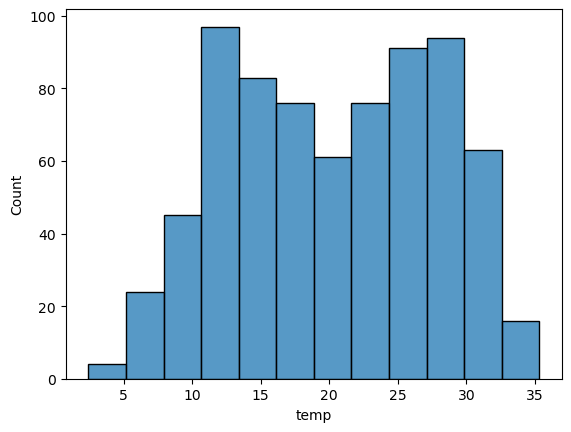

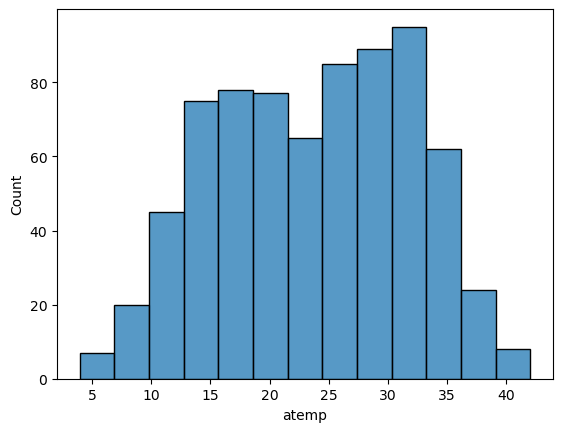

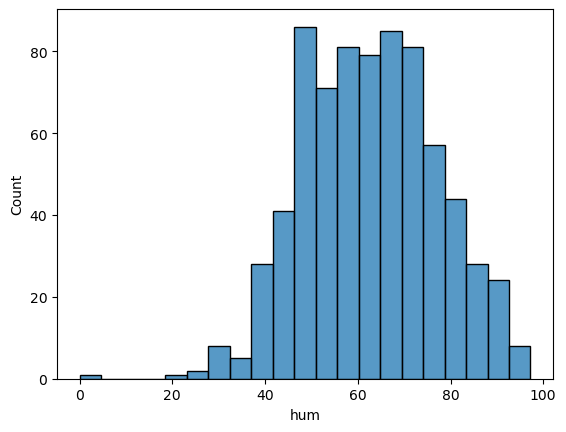

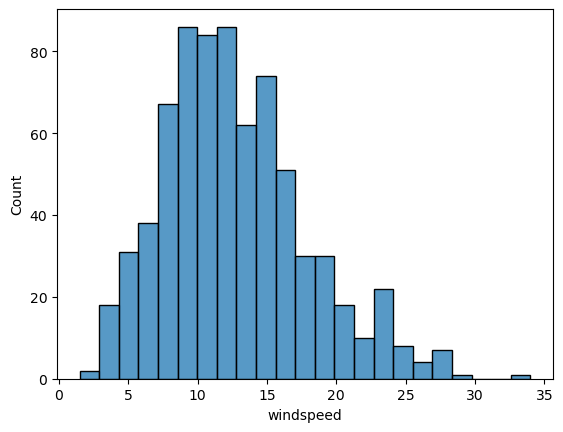

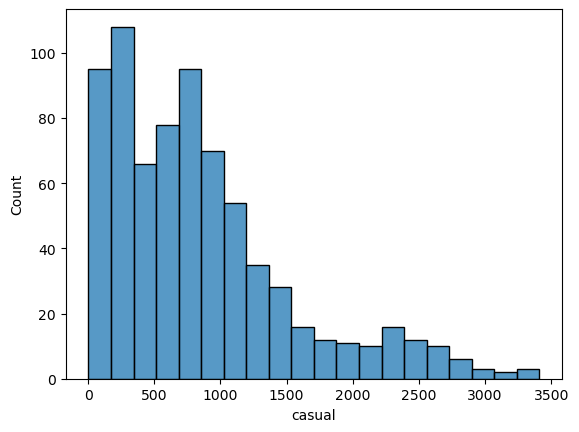

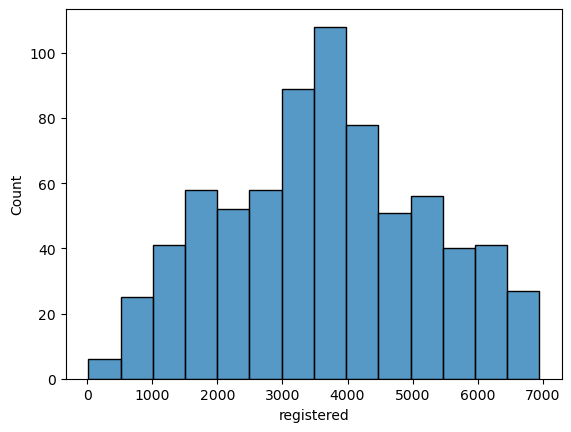

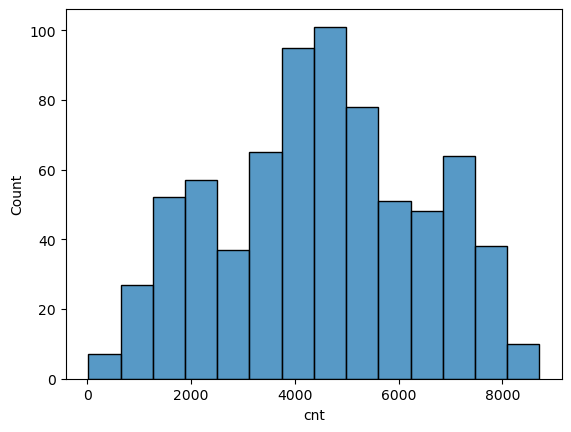

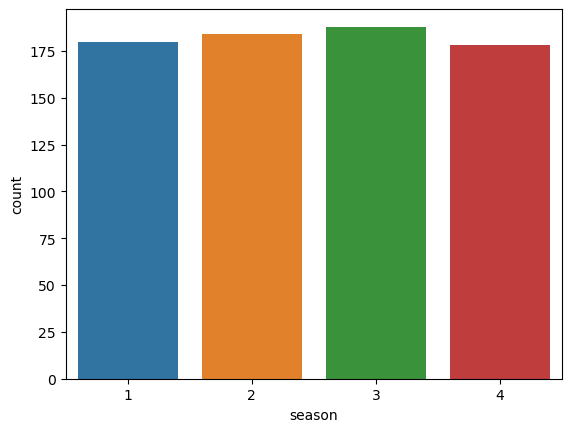

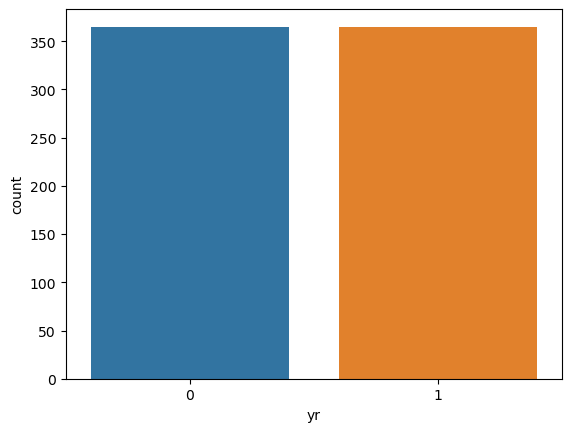

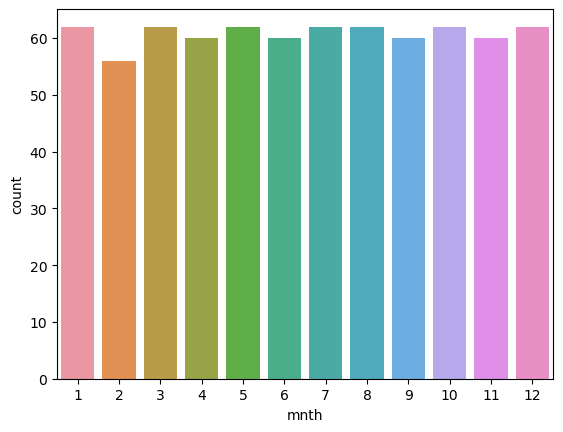

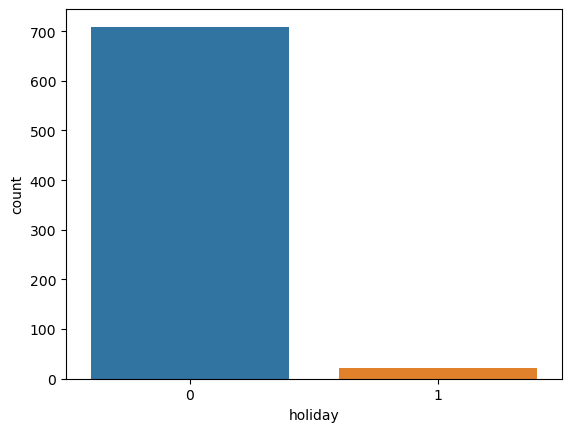

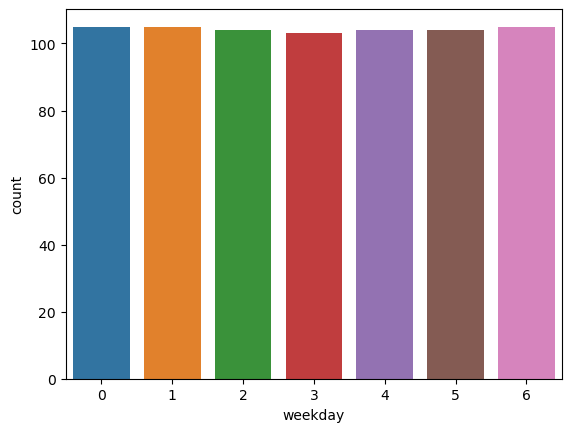

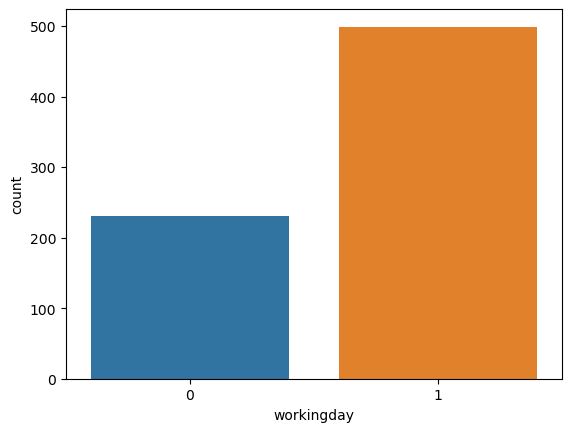

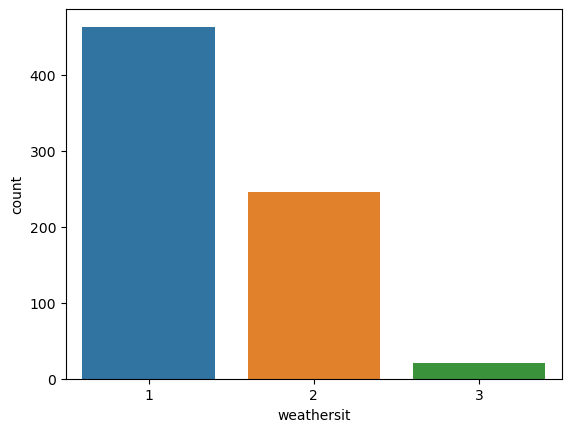

In [9]:
# visualising the numeric variable
# Temp and Atemp 10 - 30 cnt is significant
# Count is high between 50-80 humidity
# Count is high when windspeed is low
# In all seasons count is not varying much
# Count is high on non holiday
# All weeks are having simialr count
# Count is high on working days
for i in num_cols:
    sns.histplot(x=bike[i])
    plt.show()
    
for i in cat_cols:
    sns.countplot(x=bike[i])
    plt.show()

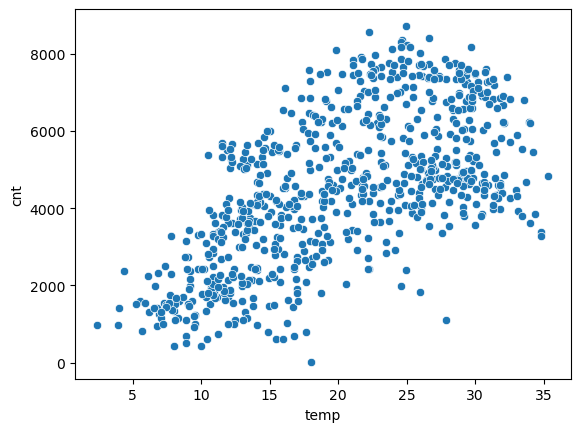

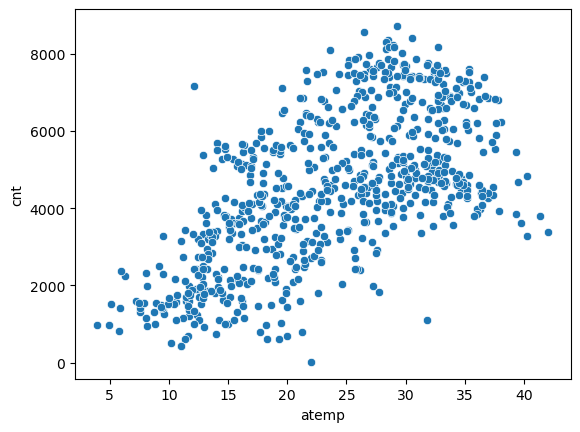

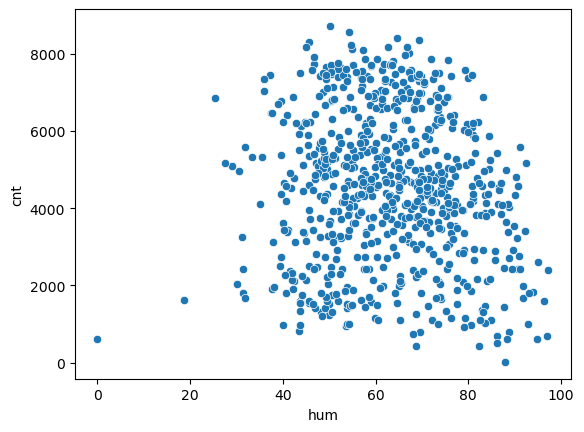

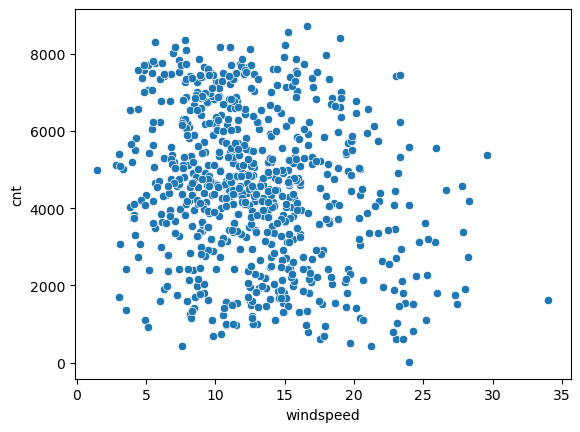

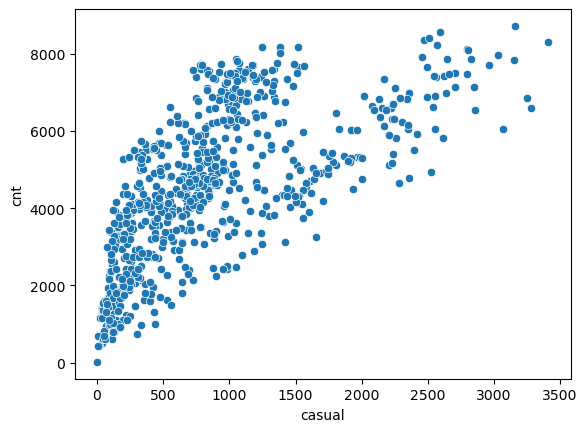

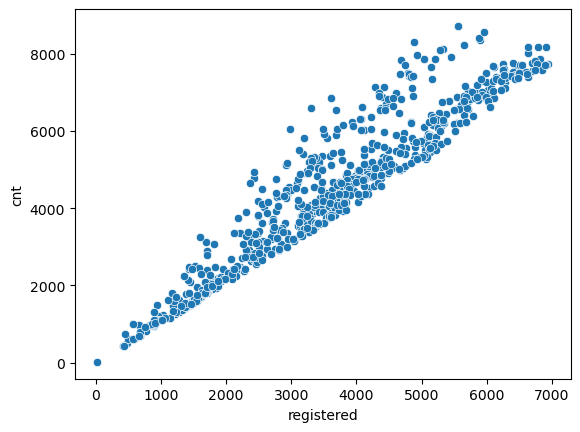

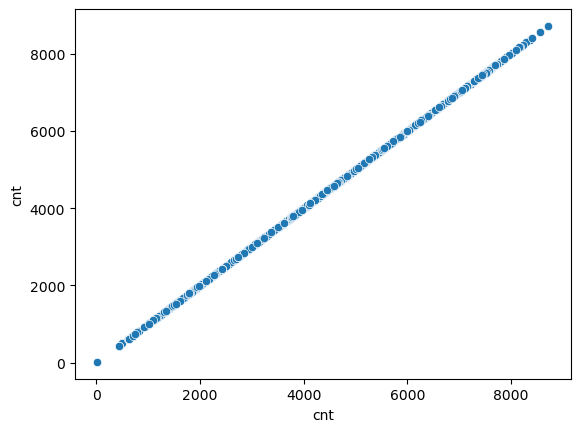

In [10]:
# Bivariate Analysis
for i in num_cols: 
    sns.scatterplot(x=bike[i],y=bike["cnt"])
    plt.show()

<Axes: xlabel='weathersit', ylabel='cnt'>

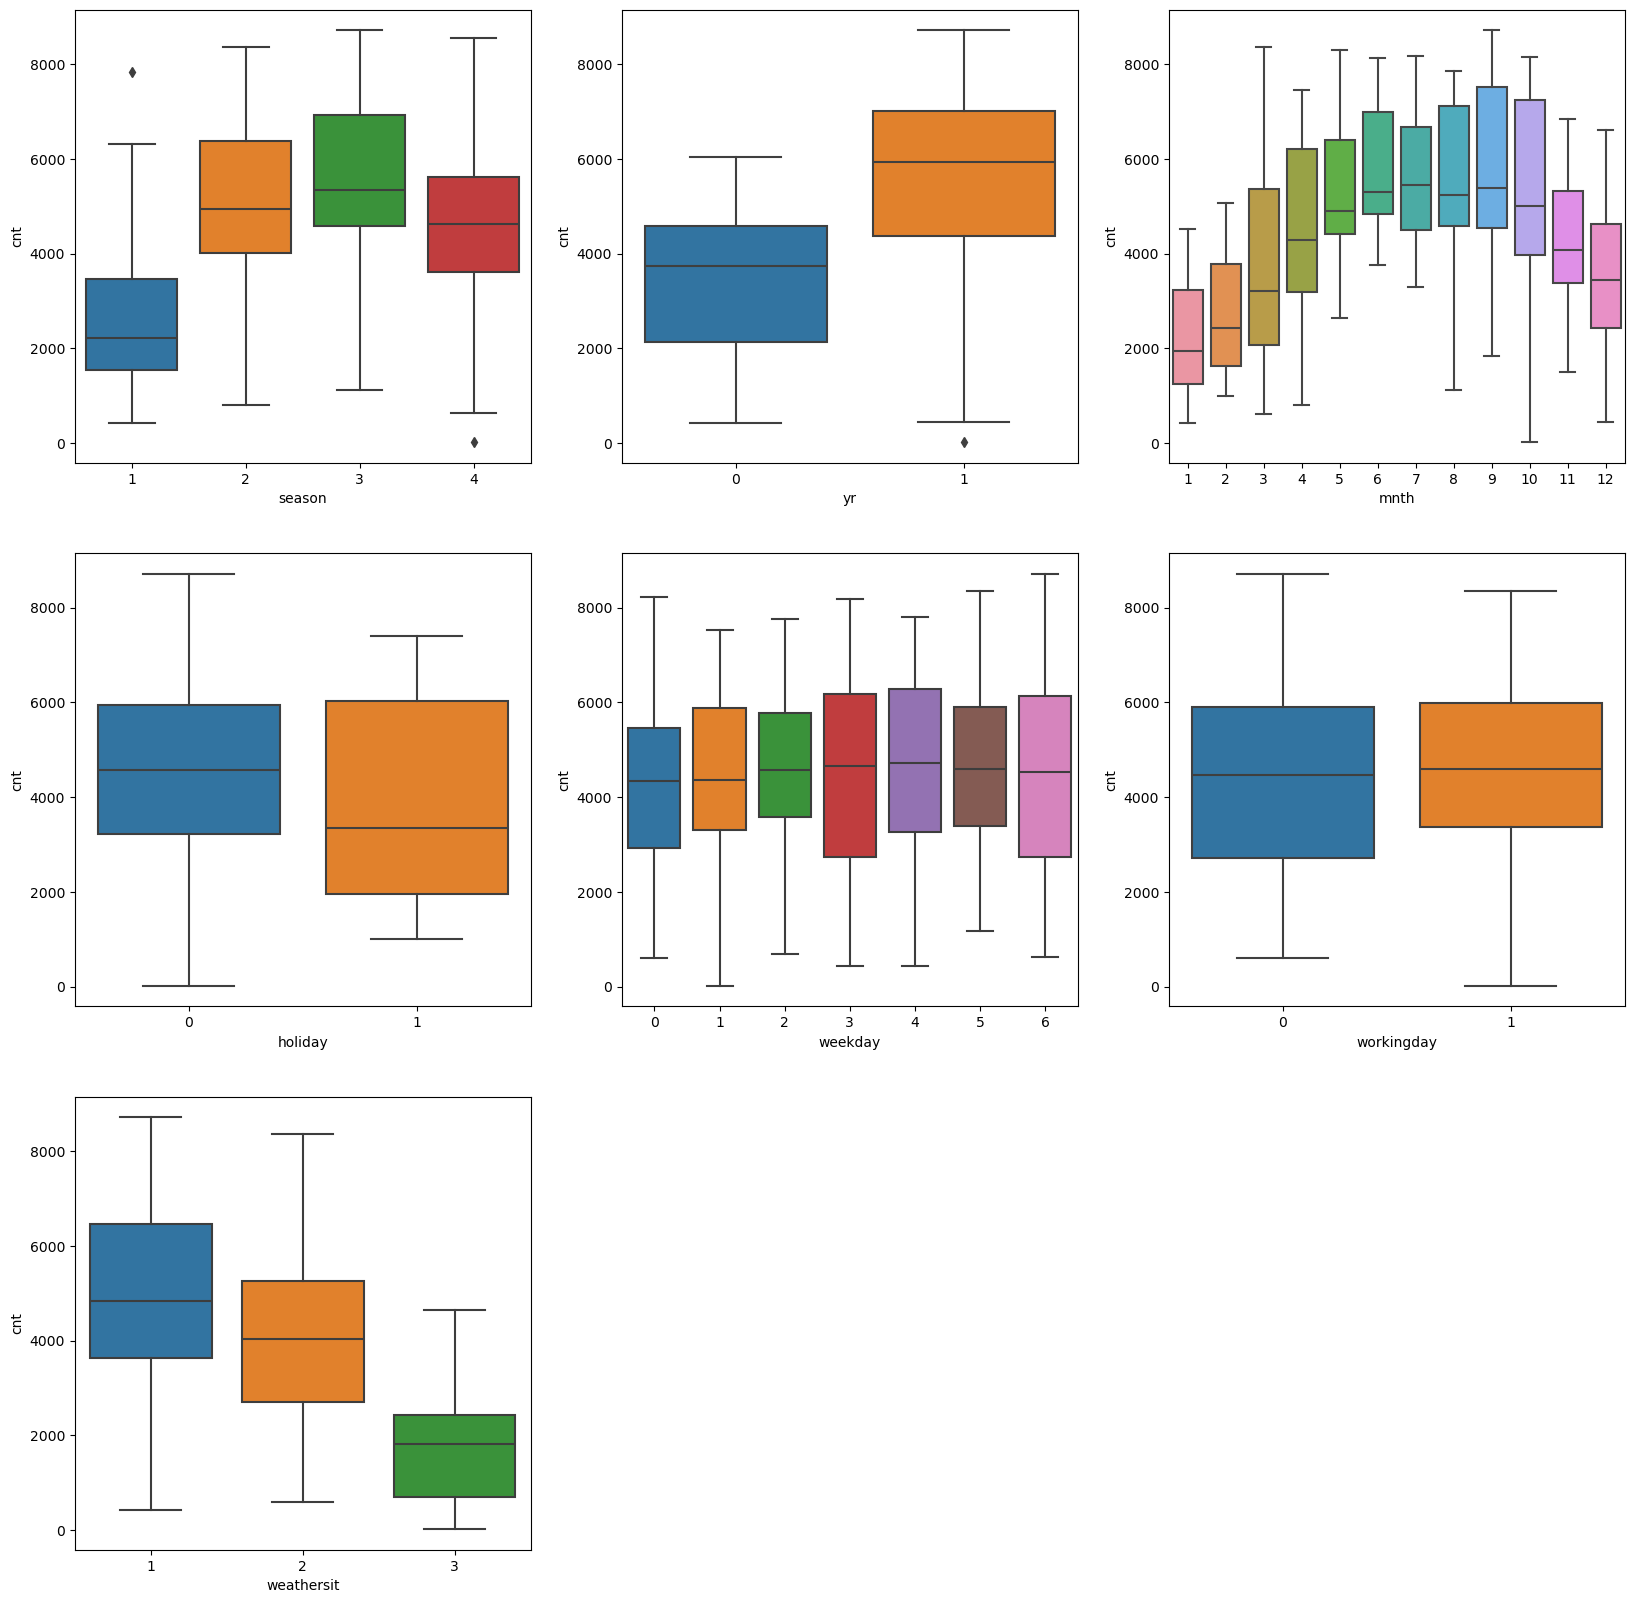

In [11]:
# visualising the categorical variable
# March, sep and oct have high no. of count
# High count on non holiday
# Clear weather has high count
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bike)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bike)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bike)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bike)

In [12]:
# convert season,mnth,weekday and weather sit numerical values to categorical value
bike["season"] = bike["season"].map({1:"spring",2:"summer",3:"fall",4:"winter"})
bike["weathersit"]=bike["weathersit"].map({1:"clear",2:"mist",3:"lightsnow",4:"heavyrain"})
bike["mnth"] = bike["mnth"].map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
bike["weekday"] = bike["weekday"].map({1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat",0:"Sun"})

<Axes: xlabel='weathersit', ylabel='cnt'>

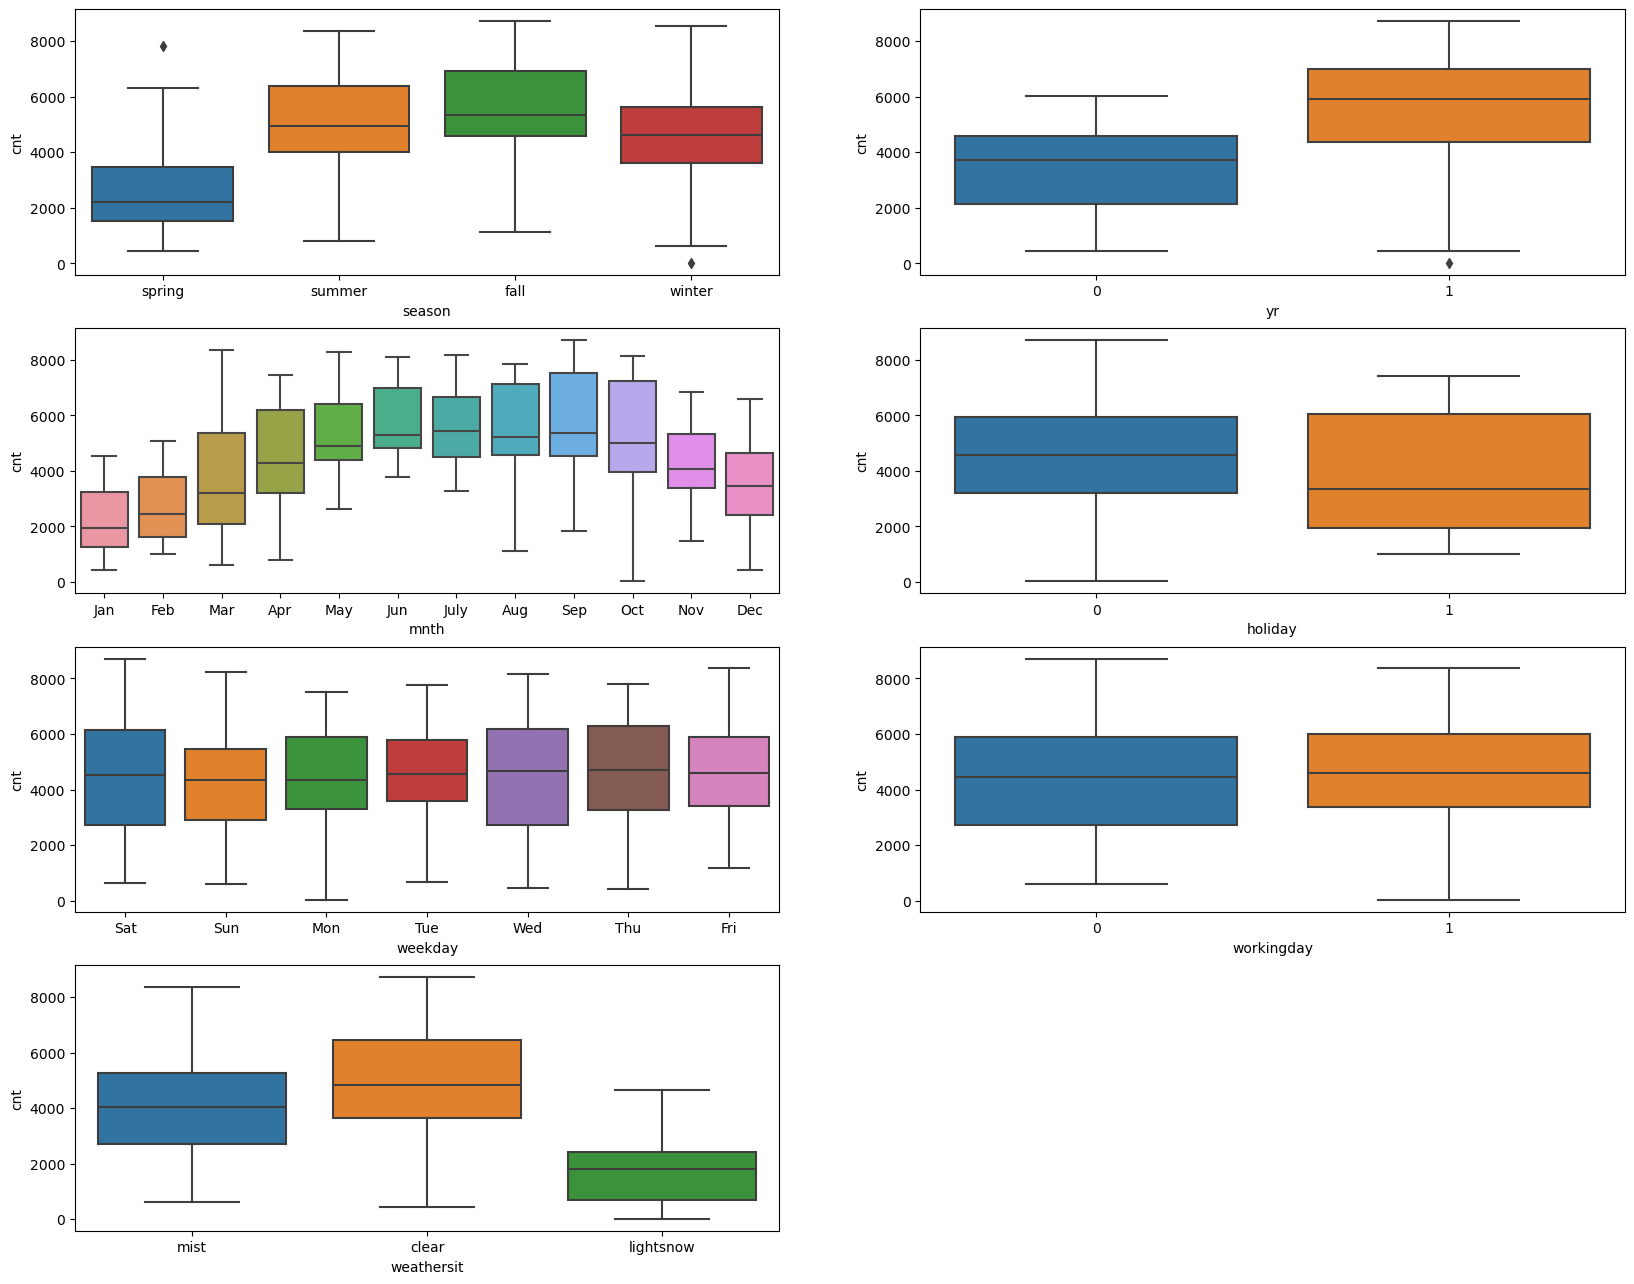

In [13]:
# visualising the categorical variable
plt.figure(figsize=(20,20))
plt.subplot(5,2,1)
sns.boxplot(x='season',y='cnt',data=bike)
plt.subplot(5,2,2)
sns.boxplot(x='yr',y='cnt',data=bike)
plt.subplot(5,2,3)
sns.boxplot(x='mnth',y='cnt',data=bike)
plt.subplot(5,2,4)
sns.boxplot(x='holiday',y='cnt',data=bike)
plt.subplot(5,2,5)
sns.boxplot(x='weekday',y='cnt',data=bike)
plt.subplot(5,2,6)
sns.boxplot(x='workingday',y='cnt',data=bike)
plt.subplot(5,2,7)
sns.boxplot(x='weathersit',y='cnt',data=bike)

## Step 2 : Preapring the Data for Modeling
- 
Other categorical varsotp dummy va
- Splitting into train and test
- Rescaling the variablesbles

In [15]:
bike.shape

(730, 16)

## Dummy Variables

In [17]:
#creating dummy variables for seasons
#dropping redundent
dummy=pd.get_dummies(bike[['season','weathersit','mnth','weekday']],drop_first=True)
dummy = dummy.replace({True: 1, False: 0})
dummy.head()

,season_spring,season_summer,season_winter,weathersit_lightsnow,weathersit_mist,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
dummy.shape

(730, 22)

In [19]:
#concat the dummy with the original
bike = pd.concat([bike,dummy],axis=1)
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,1,01-01-2018,spring,0,Jan,0,Sat,0,mist,14.110847,...,0,0,0,0,0,1,0,0,0,0
1,2,02-01-2018,spring,0,Jan,0,Sun,0,mist,14.902598,...,0,0,0,0,0,0,1,0,0,0
2,3,03-01-2018,spring,0,Jan,0,Mon,1,clear,8.050924,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,spring,0,Jan,0,Tue,1,clear,8.200000,...,0,0,0,0,0,0,0,0,1,0
4,5,05-01-2018,spring,0,Jan,0,Wed,1,clear,9.305237,...,0,0,0,0,0,0,0,0,0,1


In [20]:
# Drop columns which have been converted to dummy and extra columns
bike = bike.drop(['dteday','season','weathersit','season_winter','weathersit_lightsnow','mnth','weekday','casual','registered'],axis=1)
bike.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,1,0,0,0,0
1,2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,0
2,3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1


## Splitting data in train and test

In [22]:
bike_train, bike_test = train_test_split(bike, train_size=0.7,random_state=100)
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


## Rescaling the Features
- Min-Max scaling (normalisation): Between 0 and 1
- 
Standardisation (mean-0, sigma-1
- 
We will use MinMax scaling

In [24]:
# 1. Instantiate an object
scaler = MinMaxScaler()

# create lisy of numeric vars
num_vars = ['temp','atemp','hum','windspeed','cnt']

# 2. Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
576,577,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,...,0,0,0,0,0,0,0,0,1,0
426,427,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,...,0,0,0,0,0,1,0,0,0,0
728,729,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,...,0,0,0,0,0,0,1,0,0,0
482,483,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,...,0,0,0,0,0,1,0,0,0,0
111,112,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
bike_train.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,368.680392,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,...,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,209.596164,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,...,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187.250000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,373.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,552.750000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,729.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 3 : Training the Model

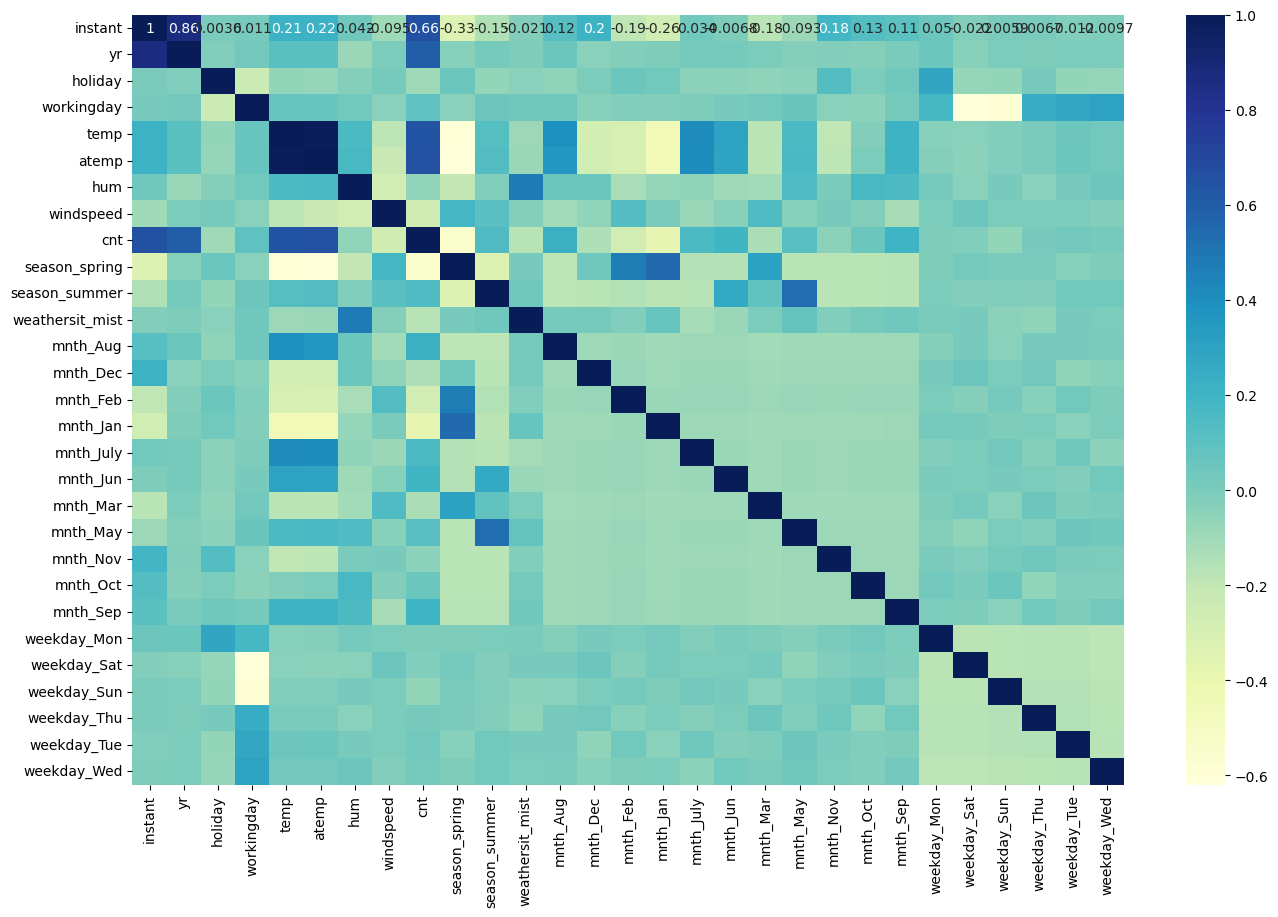

In [27]:
# heatmap
plt.figure(figsize=(16,10))
sns.heatmap(bike_train.corr(),annot=True , cmap="YlGnBu")
plt.show()

In [28]:
# x_train, y_train
y_train = bike_train.pop('cnt')
x_train = bike_train

In [29]:
x_train.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,368.680392,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.243137,0.247059,...,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,209.596164,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.429398,0.431725,...,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187.250000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,373.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,552.750000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,729.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
# add a constant
# OLS - Ordinary Least Squares
x_train_sm = sm.add_constant(x_train['mnth_Sep'])

#create first model
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     21.53
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           4.44e-06
Time:                        00:02:53   Log-Likelihood:                 49.485
No. Observations:                 510   AIC:                            -94.97
Df Residuals:                     508   BIC:                            -86.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5001      0.010     49.226      0.000       0.480       0.520
mnth_Sep       0.1663      0.036      4.640      0.000       0.096       0.237
==============================================================================
Omnibus:                       55.259   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.455
Skew:                          -0.066   Prob(JB):                     0.000267
Kurtosis:                       2.130   Cond. No.                         3.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# add a constant
# OLS - Ordinary Least Squares
x_train_sm = sm.add_constant(x_train[['mnth_Sep','season_spring','holiday']])

#create first model
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     79.03
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           6.10e-42
Time:                        00:02:53   Log-Likelihood:                 136.89
No. Observations:                 510   AIC:                            -265.8
Df Residuals:                     506   BIC:                            -248.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5752      0.010     57.283      0.000       0.555       0.595
mnth_Sep          0.0963      0.031      3.133      0.002       0.036       0.157
season_spring    -0.2747      0.019    -14.096      0.000      -0.313      -0.236
holiday          -0.1039      0.052     -1.985      0.048      -0.207      -0.001
==============================================================================
Omnibus:                        1.494   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.474   Jarque-Bera (JB):                1.434
Skew:                          -0.040   Prob(JB):                        0.488
Kurtosis:                       2.753   Cond. No.                         6.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# add a constant
# OLS - Ordinary Least Squares
x_train_sm = sm.add_constant(x_train[['mnth_Sep','season_spring','holiday','yr','temp','season_summer']])

#create first model
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     246.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.95e-146
Time:                        00:02:53   Log-Likelihood:                 388.59
No. Observations:                 510   AIC:                            -763.2
Df Residuals:                     503   BIC:                            -733.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2053      0.019     10.552      0.000       0.167       0.243
mnth_Sep          0.0608      0.020      3.116      0.002       0.022       0.099
season_spring    -0.1400      0.016     -8.922      0.000      -0.171      -0.109
holiday          -0.0708      0.032     -2.206      0.028      -0.134      -0.008
yr                0.2408      0.010     23.740      0.000       0.221       0.261
temp              0.4032      0.029     14.100      0.000       0.347       0.459
season_summer     0.0008      0.013      0.066      0.947      -0.024       0.026
==============================================================================
Omnibus:                      110.947   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              309.544
Skew:                          -1.050   Prob(JB):                     6.07e-68
Kurtosis:                       6.187   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# add a constant
# OLS - Ordinary Least Squares
x_train_sm = sm.add_constant(x_train[['mnth_Sep','season_spring','holiday','yr','temp','season_summer','windspeed']])

#create first model
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     228.9
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          9.07e-152
Time:                        00:02:53   Log-Likelihood:                 404.37
No. Observations:                 510   AIC:                            -792.7
Df Residuals:                     502   BIC:                            -758.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2607      0.021     12.258      0.000       0.219       0.302
mnth_Sep          0.0560      0.019      2.955      0.003       0.019       0.093
season_spring    -0.1287      0.015     -8.380      0.000      -0.159      -0.099
holiday          -0.0681      0.031     -2.184      0.029      -0.129      -0.007
yr                0.2415      0.010     24.538      0.000       0.222       0.261
temp              0.3908      0.028     14.037      0.000       0.336       0.445
season_summer     0.0122      0.013      0.974      0.331      -0.012       0.037
windspeed        -0.1694      0.030     -5.662      0.000      -0.228      -0.111
==============================================================================
Omnibus:                       91.026   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.294
Skew:                          -0.929   Prob(JB):                     1.31e-46
Kurtosis:                       5.548   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Create a dataframe that will contain the names of all the feature variable and their respective VIF
vif = pd.DataFrame()
vif['Features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,18.93
2,season_spring,1.82
5,temp,1.65
6,season_summer,1.22
1,mnth_Sep,1.11
7,windspeed,1.08
3,holiday,1.01
4,yr,1.01


In [35]:
# add a constant
# OLS - Ordinary Least Squares
x_train_sm = sm.add_constant(x_train[['mnth_Sep','season_spring','holiday','yr','temp','season_summer','windspeed','weathersit_mist']])

#create first model
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     222.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.05e-159
Time:                        00:02:53   Log-Likelihood:                 425.17
No. Observations:                 510   AIC:                            -832.3
Df Residuals:                     501   BIC:                            -794.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2955      0.021     13.991      0.000       0.254       0.337
mnth_Sep            0.0646      0.018      3.538      0.000       0.029       0.100
season_spring      -0.1309      0.015     -8.865      0.000      -0.160      -0.102
holiday            -0.0769      0.030     -2.566      0.011      -0.136      -0.018
yr                  0.2416      0.009     25.540      0.000       0.223       0.260
temp                0.3710      0.027     13.779      0.000       0.318       0.424
season_summer       0.0170      0.012      1.409      0.159      -0.007       0.041
windspeed          -0.1784      0.029     -6.195      0.000      -0.235      -0.122
weathersit_mist    -0.0652      0.010     -6.525      0.000      -0.085      -0.046
==============================================================================
Omnibus:                      114.602   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.598
Skew:                          -1.037   Prob(JB):                     1.11e-79
Kurtosis:                       6.579   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Create a dataframe that will contain the names of all the feature variable and their respective VIF
vif = pd.DataFrame()
vif['Features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,20.23
2,season_spring,1.82
5,temp,1.67
6,season_summer,1.23
1,mnth_Sep,1.12
7,windspeed,1.08
8,weathersit_mist,1.02
3,holiday,1.01
4,yr,1.01


In [37]:
# add a constant
# OLS - Ordinary Least Squares
x_train_sm = sm.add_constant(x_train[['mnth_Sep','season_spring','holiday','yr','windspeed','weathersit_mist','atemp']])


#create first model
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     253.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.57e-160
Time:                        00:02:53   Log-Likelihood:                 424.43
No. Observations:                 510   AIC:                            -832.9
Df Residuals:                     502   BIC:                            -799.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2905      0.021     13.568      0.000       0.248       0.333
mnth_Sep            0.0601      0.018      3.375      0.001       0.025       0.095
season_spring      -0.1370      0.014     -9.849      0.000      -0.164      -0.110
holiday            -0.0765      0.030     -2.553      0.011      -0.135      -0.018
yr                  0.2421      0.009     25.595      0.000       0.224       0.261
windspeed          -0.1575      0.029     -5.519      0.000      -0.214      -0.101
weathersit_mist    -0.0648      0.010     -6.500      0.000      -0.084      -0.045
atemp               0.3962      0.029     13.741      0.000       0.340       0.453
==============================================================================
Omnibus:                      121.945   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              414.420
Skew:                          -1.081   Prob(JB):                     1.02e-90
Kurtosis:                       6.851   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Create a dataframe that will contain the names of all the feature variable and their respective VIF
vif = pd.DataFrame()
vif['Features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,20.77
7,atemp,1.70
2,season_spring,1.61
1,mnth_Sep,1.06
5,windspeed,1.06
6,weathersit_mist,1.02
3,holiday,1.01
4,yr,1.01


## Feature selection using RFE

In [40]:
# Linear regression object
estimator = LinearRegression()
selector = RFE(estimator,n_features_to_select=10)

In [41]:
# identify features
selector = selector.fit(x_train,y_train)
selector.support_

array([False,  True,  True, False,  True,  True,  True,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False])

In [42]:
# Selected features
selected_features = x_train.columns[selector.support_]
print(selected_features)


Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'mnth_July', 'mnth_Oct', 'mnth_Sep'],
      dtype='object')


In [43]:
x_train.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
576,577,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,...,0,0,0,0,0,0,0,0,1,0
426,427,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,...,0,0,0,0,0,1,0,0,0,0
728,729,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,...,0,0,0,0,0,0,1,0,0,0
482,483,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,...,0,0,0,0,0,1,0,0,0,0
111,112,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# create df for all selected features
x_train_RFE = x_train[selected_features]

In [45]:
x_train_RFE.head()

,yr,holiday,temp,atemp,hum,windspeed,season_spring,mnth_July,mnth_Oct,mnth_Sep
576,1,0,0.815169,0.766351,0.725633,0.264686,0,1,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0
728,1,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0,0,0,0
111,0,0,0.345824,0.318819,0.751824,0.380981,0,0,0,0


In [46]:
# add a constant
# OLS - Ordinary Least Squares
x_train_sm_RFE = sm.add_constant(x_train_RFE)

#create first model
lr = sm.OLS(y_train,x_train_sm_RFE)

#fit
lr_model_RFE = lr.fit()

#params
lr_model_RFE.params

lr_model_RFE.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     208.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          4.05e-171
Time:                        00:02:53   Log-Likelihood:                 458.38
No. Observations:                 510   AIC:                            -894.8
Df Residuals:                     499   BIC:                            -848.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4635      0.030     15.278      0.000       0.404       0.523
yr                0.2319      0.009     25.956      0.000       0.214       0.249
holiday          -0.0767      0.028     -2.726      0.007      -0.132      -0.021
temp              0.2308      0.139      1.658      0.098      -0.043       0.504
atemp             0.2458      0.148      1.656      0.098      -0.046       0.537
hum              -0.3308      0.033    -10.092      0.000      -0.395      -0.266
windspeed        -0.2233      0.028     -7.992      0.000      -0.278      -0.168
season_spring    -0.1309      0.013     -9.707      0.000      -0.157      -0.104
mnth_July        -0.0839      0.019     -4.446      0.000      -0.121      -0.047
mnth_Oct          0.0499      0.017      2.991      0.003       0.017       0.083
mnth_Sep          0.0610      0.017      3.544      0.000       0.027       0.095
==============================================================================
Omnibus:                       90.743   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.722
Skew:                          -0.901   Prob(JB):                     9.66e-50
Kurtosis:                       5.715   Cond. No.                         72.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Create a dataframe that will contain the names of all the feature variable and their respective VIF
vif = pd.DataFrame()
vif['Features'] = x_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(x_train_RFE.values,i) for i in range(x_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,atemp,343.81
2,temp,338.47
4,hum,11.04
5,windspeed,4.01
0,yr,2.03
6,season_spring,1.86
7,mnth_July,1.40
9,mnth_Sep,1.22
8,mnth_Oct,1.21
1,holiday,1.03


In [48]:
# High VIF for temp, drop temp
x = x_train_RFE.drop(['atemp'],axis=1)

# add a constant
# OLS - Ordinary Least Squares
x_train_sm_RFE = sm.add_constant(x)

#create first model
lr = sm.OLS(y_train,x_train_sm_RFE)

#fit
lr_model_RFE = lr.fit()

#params
lr_model_RFE.params

lr_model_RFE.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     230.7
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.01e-171
Time:                        00:02:53   Log-Likelihood:                 456.98
No. Observations:                 510   AIC:                            -894.0
Df Residuals:                     500   BIC:                            -851.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4698      0.030     15.581      0.000       0.411       0.529
yr                0.2318      0.009     25.907      0.000       0.214       0.249
holiday          -0.0782      0.028     -2.776      0.006      -0.133      -0.023
temp              0.4567      0.028     16.374      0.000       0.402       0.512
hum              -0.3285      0.033    -10.013      0.000      -0.393      -0.264
windspeed        -0.2321      0.027     -8.443      0.000      -0.286      -0.178
season_spring    -0.1322      0.013     -9.803      0.000      -0.159      -0.106
mnth_July        -0.0841      0.019     -4.448      0.000      -0.121      -0.047
mnth_Oct          0.0516      0.017      3.093      0.002       0.019       0.084
mnth_Sep          0.0606      0.017      3.516      0.000       0.027       0.094
==============================================================================
Omnibus:                       87.335   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.769
Skew:                          -0.877   Prob(JB):                     6.28e-47
Kurtosis:                       5.634   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Create a dataframe that will contain the names of all the feature variable and their respective VIF
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,10.58
2,temp,10.45
4,windspeed,3.92
0,yr,2.03
5,season_spring,1.86
6,mnth_July,1.40
8,mnth_Sep,1.22
7,mnth_Oct,1.20
1,holiday,1.03


In [50]:
# High VIF for hum, drop hum
# p value for features is less than 0.5
# VIF is less than 5 for all features
# R- square is 0.766. We can consider this final model from RFE
x = x_train_RFE.drop(['atemp','hum'],axis=1)

# add a constant
# OLS - Ordinary Least Squares
x_train_sm_RFE = sm.add_constant(x)

#create first model
lr = sm.OLS(y_train,x_train_sm_RFE)

#fit
lr_model_RFE = lr.fit()

#params
lr_model_RFE.params

lr_model_RFE.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     206.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          4.01e-153
Time:                        00:02:54   Log-Likelihood:                 410.37
No. Observations:                 510   AIC:                            -802.7
Df Residuals:                     501   BIC:                            -764.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2422      0.022     11.169      0.000       0.200       0.285
yr                0.2407      0.010     24.696      0.000       0.222       0.260
holiday          -0.0708      0.031     -2.297      0.022      -0.131      -0.010
temp              0.4353      0.030     14.300      0.000       0.376       0.495
windspeed        -0.1676      0.029     -5.730      0.000      -0.225      -0.110
season_spring    -0.1236      0.015     -8.391      0.000      -0.153      -0.095
mnth_July        -0.0650      0.021     -3.155      0.002      -0.105      -0.025
mnth_Oct          0.0260      0.018      1.443      0.150      -0.009       0.062
mnth_Sep          0.0436      0.019      2.325      0.020       0.007       0.081
==============================================================================
Omnibus:                      109.200   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.192
Skew:                          -1.053   Prob(JB):                     1.59e-63
Kurtosis:                       6.029   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Create a dataframe that will contain the names of all the feature variable and their respective VIF
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,4.46
3,windspeed,3.73
0,yr,2.02
4,season_spring,1.53
5,mnth_July,1.33
7,mnth_Sep,1.21
6,mnth_Oct,1.13
1,holiday,1.03


In [52]:
# Using RFE features in manually identified features R2 increased from 0.766 to 0.787

# add a constant
# OLS - Ordinary Least Squares
x_train_sm = sm.add_constant(x_train[['mnth_Sep','season_spring','holiday','yr','windspeed','weathersit_mist','temp','mnth_July','mnth_Oct']])

#create first model
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     205.1
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.43e-161
Time:                        00:02:54   Log-Likelihood:                 433.06
No. Observations:                 510   AIC:                            -846.1
Df Residuals:                     500   BIC:                            -803.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2772      0.021     12.962      0.000       0.235       0.319
mnth_Sep            0.0492      0.018      2.736      0.006       0.014       0.085
season_spring      -0.1270      0.014     -9.004      0.000      -0.155      -0.099
holiday            -0.0806      0.030     -2.729      0.007      -0.139      -0.023
yr                  0.2406      0.009     25.786      0.000       0.222       0.259
windspeed          -0.1754      0.028     -6.257      0.000      -0.230      -0.120
weathersit_mist    -0.0672      0.010     -6.820      0.000      -0.087      -0.048
temp                0.4205      0.029     14.387      0.000       0.363       0.478
mnth_July          -0.0748      0.020     -3.782      0.000      -0.114      -0.036
mnth_Oct            0.0264      0.017      1.530      0.127      -0.008       0.060
==============================================================================
Omnibus:                      135.552   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              500.802
Skew:                          -1.176   Prob(JB):                    1.79e-109
Kurtosis:                       7.247   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Create a dataframe that will contain the names of all the feature variable and their respective VIF
vif = pd.DataFrame()
vif['Features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,21.35
7,temp,2.03
2,season_spring,1.71
8,mnth_July,1.29
1,mnth_Sep,1.12
9,mnth_Oct,1.08
5,windspeed,1.05
4,yr,1.02
6,weathersit_mist,1.02
3,holiday,1.01


## Step 4 Residual Analysis

<Axes: ylabel='Density'>

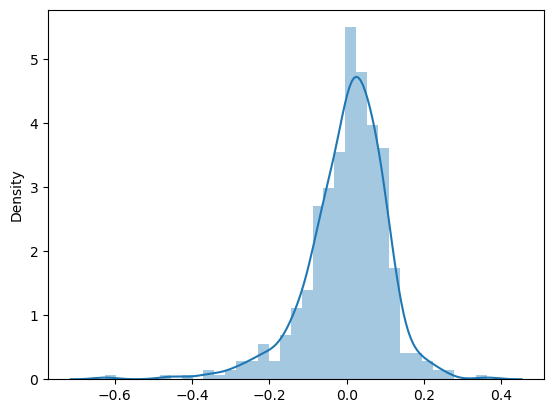

In [55]:
# Manually created model
y_train_pred = lr_model.predict(x_train_sm)

res = y_train - y_train_pred
sns.distplot(res)

<Axes: >

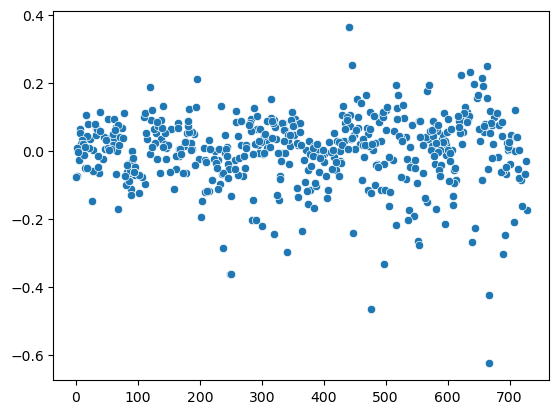

In [56]:
res = y_train - y_train_pred
sns.scatterplot(res)


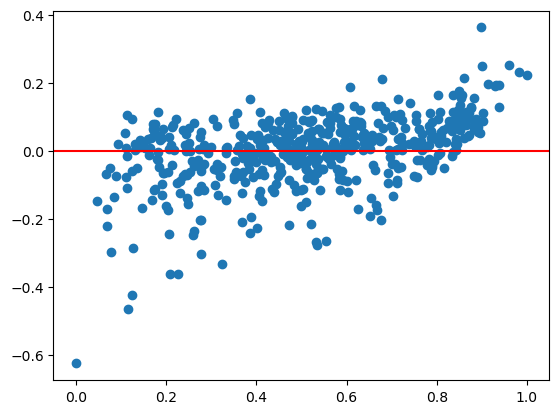

In [57]:
fig=plt.figure()
res = y_train - y_train_pred
plt.scatter(y_train,res)
plt.axhline(y = 0.0, color = 'r', linestyle = '-') 

<Axes: ylabel='Density'>

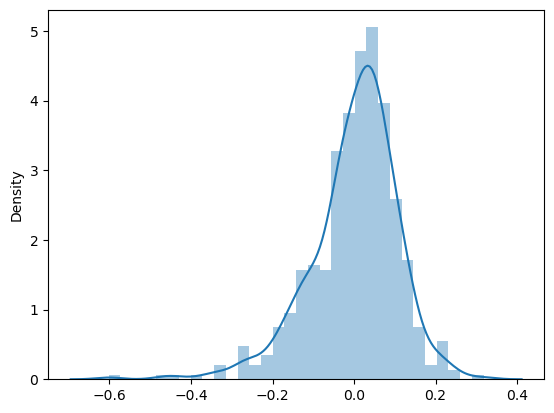

In [58]:
# Model created using RFE
y_train_pred = lr_model_RFE.predict(x_train_sm_RFE)

res = y_train - y_train_pred
sns.distplot(res)

## Prediction and Evaluation on the Test Set

In [60]:
# create lisy of numeric vars
num_vars = ['temp','atemp','hum','windspeed','cnt']

# 2. Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
184,185,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,...,0,0,0,0,1,0,0,0,0,0
535,536,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,...,0,0,0,0,0,0,0,0,0,1
299,300,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,...,0,0,1,0,0,0,0,1,0,0
221,222,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,...,0,0,0,0,0,0,0,0,0,1
152,153,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
bike_test.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,358.127273,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,...,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,214.116582,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,...,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,4.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,171.500000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,350.500000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,539.750000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,730.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
y_test = bike_test.pop('cnt')
x_test = bike_test

In [63]:
# add a constant
x_test_sm = sm.add_constant(x_test[['mnth_Sep','season_spring','holiday','yr','windspeed','weathersit_mist','atemp','mnth_July','mnth_Oct']])
x_test_sm.head()
x_test_sm.shape


(220, 10)

In [64]:
x_test_sm.describe()

,const,mnth_Sep,season_spring,holiday,yr,windspeed,weathersit_mist,atemp,mnth_July,mnth_Oct
count,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,1.0,0.086364,0.254545,0.036364,0.481818,0.313293,0.318182,0.532847,0.104545,0.086364
std,0.0,0.281541,0.436599,0.187620,0.500809,0.159584,0.466833,0.217401,0.306665,0.281541
min,1.0,0.000000,0.000000,0.000000,0.000000,-0.042808,0.000000,0.025950,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.198843,0.000000,0.344870,0.000000,0.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.300126,0.000000,0.544652,0.000000,0.000000
75%,1.0,0.000000,1.000000,0.000000,1.000000,0.402718,1.000000,0.713308,0.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,0.807474,1.000000,0.980934,1.000000,1.000000


In [65]:
# predict
y_test_pred = lr_model.predict(x_test_sm)

In [66]:
# evaluate test model R squared value
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7758294782242466

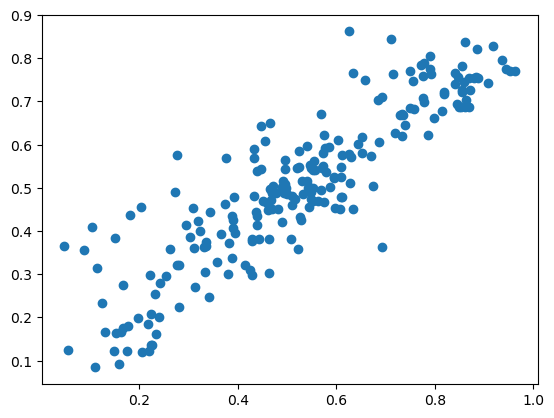

In [67]:
fig=plt.figure()
plt.scatter(y_test,y_test_pred)

In [68]:
# Final regression equation
##y= 0.0492*mnth_Sep - 0.1270*season_spring - 0.0806*holiday + 0.2406*yr - 0.1754*windspeed
##- 0.0672*weathersit_mist + 0.4205*temp - 0.0748*mnth_July + 0.0264*mnth_Oct + const*0.2772